<a href="https://colab.research.google.com/github/saks0106/DL_Frequent_Lookout/blob/main/3_0_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The MNIST Dataset**


MNIST: *Modified National Institute of Standards and Technology*

In [ ]:
https://colah.github.io/

In [ ]:
28*28

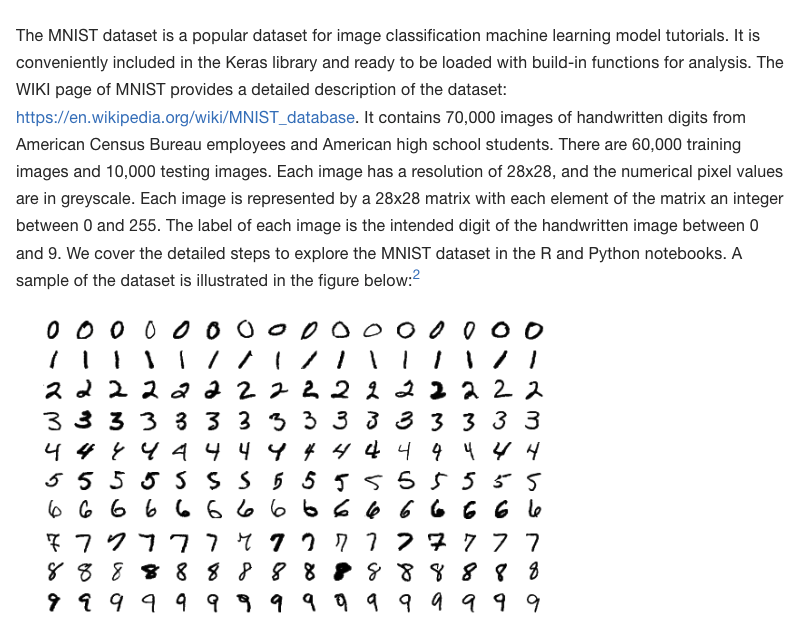

[link to the wiki page](https://en.wikipedia.org/wiki/MNIST_database)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense


In [ ]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
x_train.shape

(60000, 28, 28)

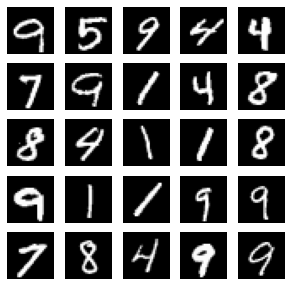

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
# plt.savefig("mnist-samples.png")
# plt.close('all')

In [ ]:
# compute the number of labels as it is a multiclass problem
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.dtype

dtype('float32')

In [ ]:
x_train.shape # 28*28 needs to be converted into 1D

(60000, 28, 28)

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1] #28
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size,activation = 'relu')) #input_dim = 784
model.add(Dense(hidden_units,activation = 'relu')) # 256
model.add(Dense(num_labels, activation='softmax'))

In [ ]:
model.summary() #if dropout added, Non-trainable params will not be zero
#784*256 is close to 200960
#256*256 is close to 65792 + 256 are biases
#256*10 is close to 2560 + 10 biases

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


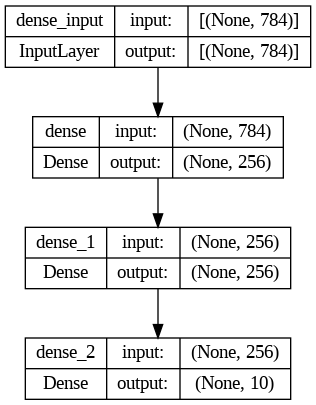

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3)
#you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 10ms/step - loss: 0.3069 - accuracy: 0.9126 - val_loss: 0.1620 - val_accuracy: 0.9525
Epoch 2/20
329/329 [==============================] - 3s 8ms/step - loss: 0.1150 - accuracy: 0.9653 - val_loss: 0.1205 - val_accuracy: 0.9644
Epoch 3/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0733 - accuracy: 0.9780 - val_loss: 0.1105 - val_accuracy: 0.9661
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0995 - val_accuracy: 0.9713
Epoch 5/20
329/329 [==============================] - 3s 9ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0945 - val_accuracy: 0.9718
Epoch 6/20
329/329 [==============================] - 3s 8ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.1021 - val_accuracy: 0.9712
Epoch 7/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.1036 - val_accuracy: 0.9722
Ep

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9766

Test accuracy: 97.7%


In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.9894

Test accuracy: 98.9%


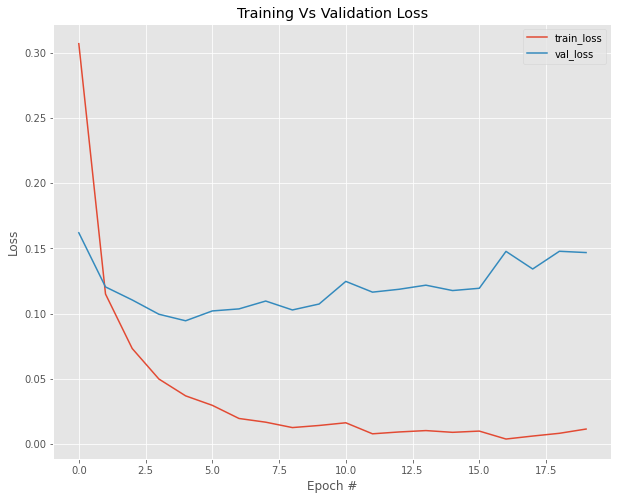

In [ ]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding L2 Regualarisation

In [ ]:
from keras.layers import Dense , Activation, Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 10ms/step - loss: 0.4967 - accuracy: 0.9094 - val_loss: 0.3000 - val_accuracy: 0.9505
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 0.2365 - accuracy: 0.9617 - val_loss: 0.2196 - val_accuracy: 0.9608
Epoch 3/20
329/329 [==============================] - 4s 13ms/step - loss: 0.1758 - accuracy: 0.9718 - val_loss: 0.1923 - val_accuracy: 0.9652
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1476 - accuracy: 0.9763 - val_loss: 0.1659 - val_accuracy: 0.9695
Epoch 5/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1310 - accuracy: 0.9788 - val_loss: 0.1605 - val_accuracy: 0.9695
Epoch 6/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1215 - accuracy: 0.9815 - val_loss: 0.1613 - val_accuracy: 0.9676
Epoch 7/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1136 - accuracy: 0.9834 - val_loss: 0.1729 - val_accuracy: 0.9658
E

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1202 - accuracy: 0.9789

Test accuracy: 97.9%


In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0888 - accuracy: 0.9883

Test accuracy: 98.8%


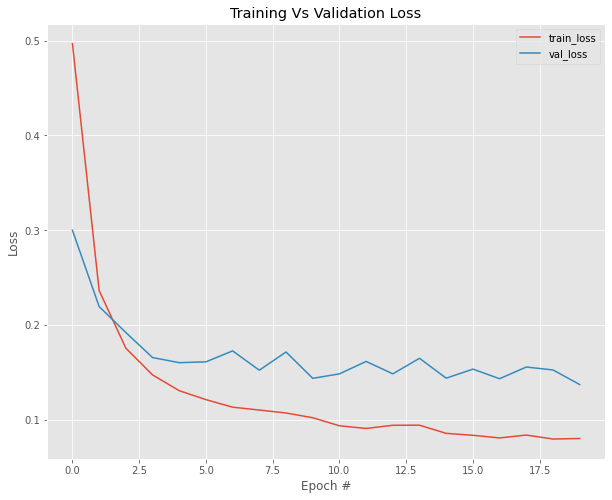

In [ ]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding Dropout

In [ ]:
from keras.layers import Dense , Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer, L2 regularizer removed
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 11ms/step - loss: 0.5060 - accuracy: 0.8432 - val_loss: 0.1792 - val_accuracy: 0.9463
Epoch 2/20
329/329 [==============================] - 3s 10ms/step - loss: 0.2264 - accuracy: 0.9330 - val_loss: 0.1409 - val_accuracy: 0.9578
Epoch 3/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1692 - accuracy: 0.9482 - val_loss: 0.1129 - val_accuracy: 0.9654
Epoch 4/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1420 - accuracy: 0.9565 - val_loss: 0.1062 - val_accuracy: 0.9682
Epoch 5/20
329/329 [==============================] - 5s 16ms/step - loss: 0.1263 - accuracy: 0.9617 - val_loss: 0.1061 - val_accuracy: 0.9679
Epoch 6/20
329/329 [==============================] - 7s 21ms/step - loss: 0.1099 - accuracy: 0.9669 - val_loss: 0.0985 - val_accuracy: 0.9704
Epoch 7/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1001 - accuracy: 0.9682 - val_loss: 0.0941 - val_accuracy: 0.9728

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9805

Test accuracy: 98.0%


In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9911

Test accuracy: 99.1%


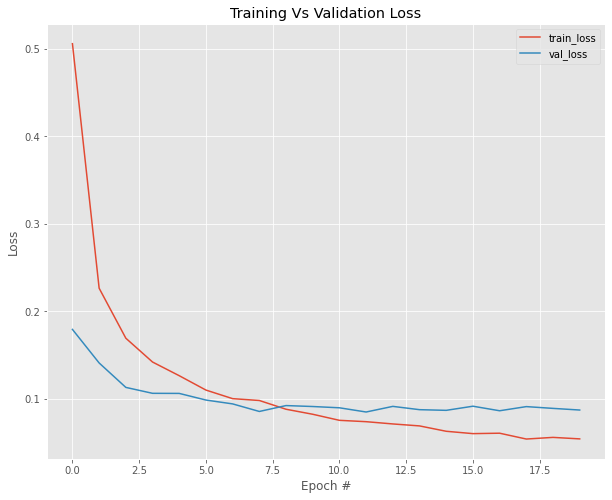

In [ ]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Assignment

Combine both L2 and Dropout and report your findings.
1. Did you experience any change in performance?
2. Did the error reduced?
3. Were there any significant improvement in the validation loss as against the training loss?

